In [66]:
import math
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE

import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")

In [67]:
from IPython.core.pylabtools import figsize

figsize(20, 6)

In [2]:
train = pd.read_csv(r'../data/final-train.csv', sep=';',encoding="UTF8").drop(['Unnamed: 0'],axis=1)
test = pd.read_csv('../data/final-test.csv', sep=';',encoding="UTF8")

In [3]:
print(train.shape)
train.head()

(9852, 166)


,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q041,Q042,Q043,Q044,Q045,Q046,Q047,Q048,Q049,Q050
0,ed50e8aaa58e7a806c337585efee9ca41f1eb1ad,2016,4314902,Porto Alegre,43,RS,24,M,0.0,1,...,5.0,A,A,A,A,A,A,A,B,D
1,2c3acac4b33ec2b195d77e7c04a2d75727fad723,2016,2304707,Granja,23,CE,17,F,0.0,3,...,NaN,A,A,C,A,B,A,A,C,A
2,a37c99ec251d4f6e8ddbeabadf1c87fdbfddc4d1,2016,2902005,Aracatu,29,BA,18,F,0.0,1,...,NaN,A,A,A,A,A,A,A,A,A
3,63b4e128e9ffe8ab27f5d093db1976ef4f353e0a,2016,5102637,Campo Novo do Parecis,51,MT,18,F,0.0,3,...,0.0,A,A,A,B,B,A,A,A,A
4,2eb189d4912f64b19d1967e8e84b6141aba18770,2016,4301602,Bagé,43,RS,18,F,0.0,1,...,NaN,C,A,A,A,A,D,A,A,A


In [4]:
print(test.shape)
test.head()

(4576, 47)


,NU_INSCRICAO,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q006,Q024,Q025,Q026,Q027,Q047
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,41,PR,22,F,3,1,1,5,1,...,40.0,420.0,B,A,C,A,A,C,C,A
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,21,MA,26,F,3,1,1,8,1,...,100.0,580.0,E,B,C,B,B,B,F,A
2,b38a03232f43b11c9d0788abaf060f7366053b6d,23,CE,21,M,1,1,2,0,2,...,80.0,320.0,E,E,D,B,B,A,NaN,A
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,15,PA,27,F,3,1,1,8,1,...,0.0,0.0,H,E,G,B,B,A,NaN,A
4,715494628a50142ce8cb17191cfe6d0f3cae0934,41,PR,18,M,1,1,2,0,2,...,0.0,320.0,D,H,H,C,B,A,NaN,A


In [5]:
features = [
    'NU_NOTA_CN',
    'NU_NOTA_CH',
    'NU_NOTA_LC',
    'NU_NOTA_REDACAO',
    'NU_NOTA_COMP1',
    'NU_NOTA_COMP2',
    'NU_NOTA_COMP3',
    'NU_NOTA_COMP4',
    'NU_NOTA_COMP5']

In [6]:
y_train = train['NU_NOTA_MT']

X_train = train[features]
X_test = test[features]

In [7]:
scaler = StandardScaler()  

X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

In [36]:
lr_mdl = LinearRegression(fit_intercept=True)

In [37]:
lr_mdl.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
y_pred = lr_mdl.predict(X_test)

In [39]:
y_pred_train = lr_mdl.predict(X_train)

In [40]:
r2 = metrics.r2_score(y_train, y_pred_train)
rmse = math.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
mae = metrics.mean_absolute_error(y_train, y_pred_train)

In [41]:
lr_scores = pd.DataFrame({'Linear Regression' : [r2, rmse, mae]}, index=['R2', 'RMSE', 'MAE'])
lr_scores.to_csv('../results/lr_scores.csv', sep=';', index=False)
lr_scores

,Linear Regression
R2,0.403958
RMSE,76.601547
MAE,60.958705


In [42]:
rfe = RFE(lr_mdl)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

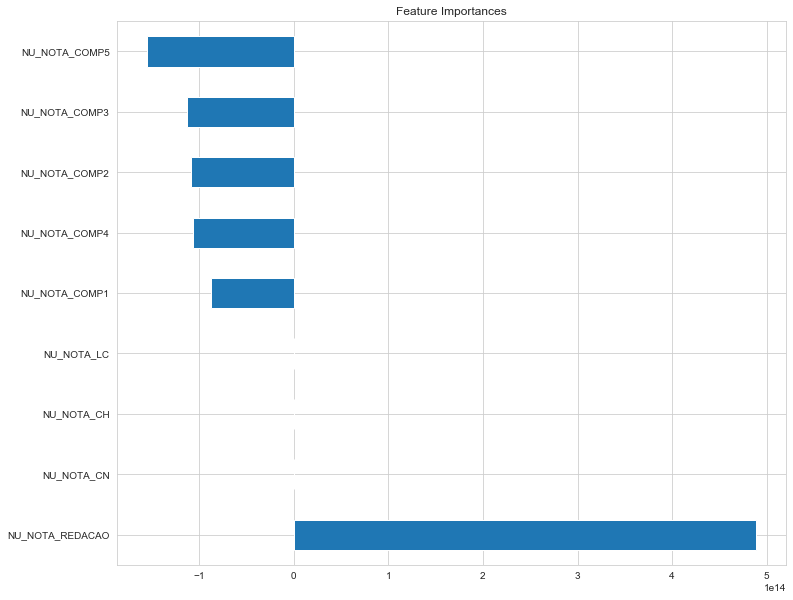

In [68]:
plt.rcParams['figure.figsize'] = [12, 10]
plt.grid()
plt.title('Feature Importances')
pd.Series(lr_mdl.coef_, index= features).nlargest(45).plot(kind='barh')
plt.show();

In [44]:
answer = pd.DataFrame()
answer['NU_INSCRICAO'] = test['NU_INSCRICAO']
print(answer.shape)
answer.head()

(4576, 1)


,NU_INSCRICAO
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968
2,b38a03232f43b11c9d0788abaf060f7366053b6d
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d
4,715494628a50142ce8cb17191cfe6d0f3cae0934


In [45]:
answer['NU_NOTA_MT'] = np.around(y_pred,2)
print(answer.shape)
answer.head()

(4576, 2)


,NU_INSCRICAO,NU_NOTA_MT
0,73ff9fcc02f0a99919906c942c2e1a1042cdcf98,438.74
1,71a95f9f1b91a82c65ad94abbdf9f54e6066f968,433.32
2,b38a03232f43b11c9d0788abaf060f7366053b6d,583.95
3,70b682d9a3636be23f6120fa9d6b164eb3c6002d,-15.82
4,715494628a50142ce8cb17191cfe6d0f3cae0934,540.30


In [46]:
print(answer.shape)
answer.to_csv('../answer.csv', index=False)

(4576, 2)


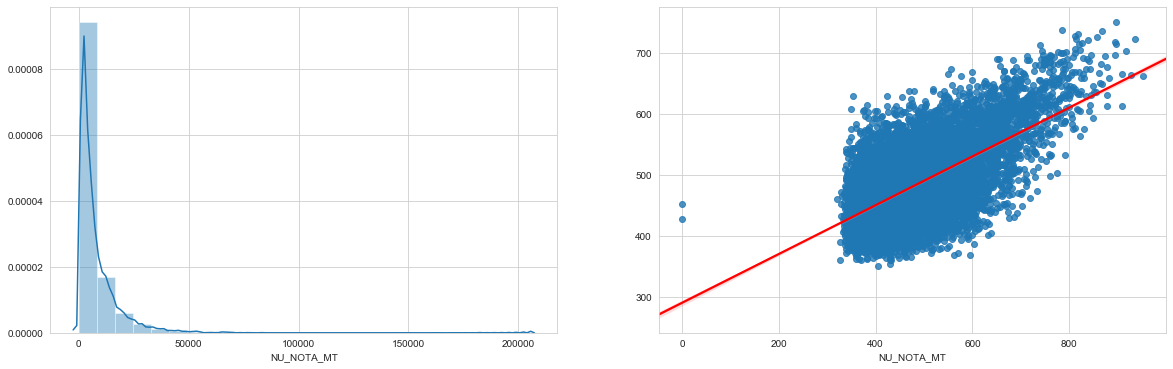

In [80]:
RSS = ((y_train - y_pred_train) **2 )

fig, ax =plt.subplots(1,2)
sns.distplot(RSS, bins= 25, hist_kws={'density':True}, ax=ax[0]);
sns.regplot(x = y_train , y = y_pred_train, line_kws={"color": "red"}, ax=ax[1]);
fig.show()